# **Decoding Code**

Average pixel value: 201.28995141308255
Standard deviation of pixel value: 1.020852387094934
rotation_angle nan


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


affine transform: None
avg_intensity_diff 0.9822980622516625
gone with the wind


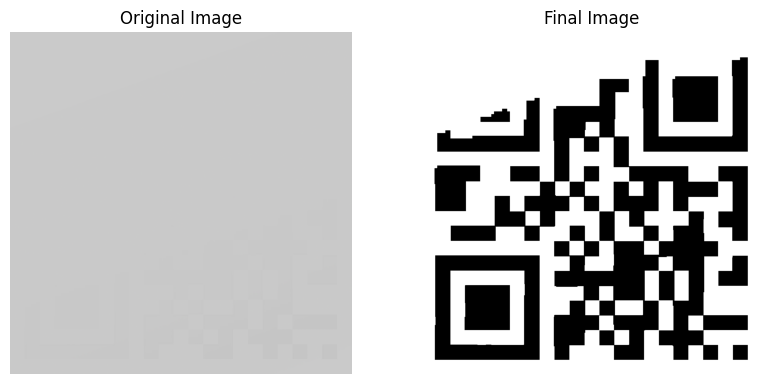

In [264]:
#DAH AKHR WAHED BA3DEL FEEHHHHH
#bey3ady 14 testcases m3ada 3,14
#jocker:MALHH W FELFEL , The Mighty Finger , Caeser-cipher , V3-QR , get started
import cv2 as cv
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math

img = cv.imread('/content/sample_data/images/10-Gone-With-The-Wind.png')

# Check if the image was loaded successfully
assert img is not None, "File could not be read, check with os.path.exists()"

avg_pixel_value = np.mean(img)
std_dev_pixel_value = np.std(img) # amalto ashan lwo SD kan 3ale f daa hy2ole en fe variability 3alyaa f momkn aaul sa3thaa eno random distributed

print("Average pixel value:", avg_pixel_value)
print("Standard deviation of pixel value:", std_dev_pixel_value)

def detect_affine_transformation(img):
    # Convert the image to grayscale
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Apply median filter to remove salt and pepper noise
    median_filtered = cv.medianBlur(gray, 11)
    # Apply thresholding to remove gray background
    _, thresholded = cv.threshold(gray, 150, 255, cv.THRESH_BINARY)
    # Morphological operations to remove small black noise regions
    kernel = np.ones((15, 15), np.uint8)
    open= cv.morphologyEx(thresholded, cv.MORPH_OPEN, kernel)
    open= cv.morphologyEx(thresholded, cv.MORPH_CLOSE, kernel)
    erosion_kernel = np.ones((5, 5), np.uint8)
    erode = cv.erode(open, erosion_kernel, iterations=2)
    final = cv2.dilate(erode,erosion_kernel , iterations=2)

    # Apply Canny edge detection to find edges in the image
    edges = cv2.Canny(final, 50, 150)

    # Apply Hough Transform to detect lines in the image
    lines = cv2.HoughLines(edges, 1, np.pi/180, 100)

    if lines is not None:
        # Analyze line orientations
        horizontal_lines = 0
        vertical_lines = 0
        for line in lines:
            rho, theta = line[0]
            # Convert theta to degrees
            angle_degrees = np.degrees(theta)
            # hena lw shaf ay line b angle ben el 80 w el 100 f da 8alebn kan horizontal abl el affine and same for VT
            if 80 <= angle_degrees <= 100 or 260 <= angle_degrees <= 280: #3ashan el actual angles of hz lines have orientations close to 90 degrees
                horizontal_lines += 1

            elif 10 <= angle_degrees <= 30 or 160 <= angle_degrees <= 170: #w el vt lines have orientations close to 0 or 180 degrees 3ashan kda bngeb el range mabenhom
                vertical_lines += 1

        # Check if there are significant numbers of both horizontal and vertical lines
        if horizontal_lines >= 2 and vertical_lines >= 2:
            return True

        else:
            return False


#de bt3ml detection l highest freq value in the image

def apply_high_pass_filter(img, threshold):
    # Compute the Fourier Transform of the image
    dft2 = np.fft.fft2(img)
    dft2_shift = np.fft.fftshift(dft2)  #shift the zero-frequency component to the center of the frequency spectrum
    magnitude_spectrum = np.max(np.abs(dft2_shift))
    # Threshold the magnitude to isolate high-frequency components
    high_frequency_mask = magnitude_spectrum > threshold

    return high_frequency_mask

def rotate(image, angle, center=None, scale=1.0):
    (h, w) = image.shape[:2]

    if center is None:
        center = (w / 2, h / 2)

    # Perform the rotation
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w, h))

    return rotated

# kol el sowar leha angle f akbr angle le image heya dy el rotated
def detect_rotation_angle(img):
    # Convert the image to grayscale
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Apply Canny edge detection
    edges = cv.Canny(gray, 50, 150, apertureSize=3)
    # Apply Hough transform to detect lines
    lines = cv.HoughLines(edges, 1, np.pi / 180, 200)
    # Calculate the average angle of detected lines
    angles = []
    if lines is not None:
        for line in lines:
            rho, theta = line[0]
            angles.append(theta)
    # Calculate the average angle
    avg_angle = np.mean(angles)
    # Convert angle from radians to degrees
    rotation_angle_degrees = math.degrees(avg_angle)
    return rotation_angle_degrees

# Detect rotation angle
rotation_angle = detect_rotation_angle(img)
print("rotation_angle",rotation_angle)

# Define a threshold angle for considering rotation
rotation_threshold = 100  # Adjust as needed



threshold_value=100
high_frequency_mask = apply_high_pass_filter(img, threshold_value)

affine_transformed = detect_affine_transformation(img)
print("affine transform:", affine_transformed)


if affine_transformed:

    print("Railfence-cipher")
    original_points = np.array([
          [316, 198],
          [972, 92],
          [60, 950],
          [719, 845]
      ], dtype=np.float32)

    # Desired points
    desired_points = np.array([
        [0, 0],
        [1010, -1],
        [1, 1008],
        [709, 1008]
    ], dtype=np.float32)

    # Calculate the affine transformation matrix
    transformation_matrix = cv2.getAffineTransform(original_points[:3], desired_points[:3])

    # Transform the image
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    final_result = cv2.warpAffine(gray, transformation_matrix, (gray.shape[1], gray.shape[0]))

else:

  if abs(rotation_angle) > rotation_threshold:
    #if abs(rotation_angle - 180) > rotation_180_threshold:
    #print("Lefy bena y donya")
    print("Matswr 3edll ya3m")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply Otsu's thresholding to segment the foreground
    _, thresholded = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    inverted_thresholded = cv2.bitwise_not(thresholded)
    inverted_colors = cv2.bitwise_not(img)

    # Apply bitwise AND operation to get the foreground
    foreground = cv2.bitwise_and(inverted_colors, inverted_colors, mask=inverted_thresholded)

    rotated_image = rotate(foreground, angle=-7.5)

    # Calculate the dimensions of the canvas
    canvas_height = rotated_image.shape[0]
    canvas_width = rotated_image.shape[1]

    # Create a blank canvas with white background
    canvas = np.ones((canvas_height, canvas_width, 3), dtype=np.uint8) * 255

    # Calculate the position to place the image slightly to the right
    top = 0
    left = 0
    # Paste the rotated image onto the canvas at the calculated position
    canvas[top:top+rotated_image.shape[0], left:left+rotated_image.shape[1]] = rotated_image
    final_result=255-canvas

  elif std_dev_pixel_value > threshold_value:

    print("jockerrr")
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Apply median filter to remove salt and pepper noise
    median_filtered = cv.medianBlur(gray, 11)
    # Apply thresholding to remove gray background
    _, thresholded = cv.threshold(median_filtered, 150, 255, cv.THRESH_BINARY)
    # Morphological operations to remove small black noise regions
    kernel = np.ones((15, 15), np.uint8)
    final_result= cv.morphologyEx(thresholded, cv.MORPH_OPEN, kernel)
    final_result= cv.morphologyEx(thresholded, cv.MORPH_CLOSE, kernel)
    erosion_kernel = np.ones((5, 5), np.uint8)
    final_result = cv.erode(final_result, erosion_kernel, iterations=2)
    final_result = cv2.dilate(final_result,erosion_kernel , iterations=2)
    erosion_kernel = np.ones((7, 7), np.uint8)
    final_result = cv2.dilate(final_result,erosion_kernel , iterations=4)
    erosion_kernel = np.ones((7, 7), np.uint8)
    final_result = cv2.erode(final_result,erosion_kernel , iterations=4)
    erosion_kernel = np.ones((2, 2), np.uint8)
    final_result = cv2.dilate(final_result,erosion_kernel , iterations=2)




  elif std_dev_pixel_value < threshold_value:
      # Check if the image is flipped vertically (bn2asm elsora top w bottom w bn compare el diff benhum w 7ata threshold lwo akbr mno ybaa elsora flipped vr)
      height, width, _ = img.shape
      top_half = img[:height // 2, :]
      bottom_half = img[height // 2:, :]
      intensity_diff = np.abs(top_half.astype(np.int32) - bottom_half.astype(np.int32))
      avg_intensity_diff = np.mean(intensity_diff)
      print("avg_intensity_diff", avg_intensity_diff )
      vertical_flip_threshold = 25

      if avg_intensity_diff > vertical_flip_threshold:
        if avg_pixel_value < threshold_value:
          print("black mirror")
          flipped_image = cv.flip(img, 1)
          gray = cv.cvtColor(flipped_image, cv.COLOR_BGR2GRAY)
          equalized_image = cv.equalizeHist(gray)
          final_result = cv.bitwise_not(equalized_image)

        elif abs(std_dev_pixel_value - avg_intensity_diff) < 1:  #ashan t check in elimage has relatively uniform texture
          print("My Phone fell & Beast mode ")
          gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
          # Threshold to identify grey pixels
          _, mask = cv2.threshold(gray, 90, 255, cv2.THRESH_BINARY)
          # Invert the mask to get the background
          background_mask = cv2.bitwise_not(mask)
          # Create a white background image
          white_background = np.full_like(img, 255)
          # Apply the background mask to fill the background with white
          output_image = cv2.bitwise_or(img, white_background, mask=background_mask)
          # Invert the edges image
          inverted_edges = cv2.bitwise_not(output_image)
          # Define the square kernel for opening
          kernel_opening = np.ones((5, 5), np.uint8)
          # Perform opening on the inverted edges image
          eroded_image = cv2.morphologyEx(inverted_edges, cv2.MORPH_OPEN, kernel_opening)
          # Define a larger square kernel for further opening
          kernel_dilation = np.ones((7, 3), np.uint8)
          # Perform opening again on the eroded image
          final_result = cv2.morphologyEx(eroded_image, cv2.MORPH_OPEN, kernel_dilation)


        elif np.any(high_frequency_mask):
          print("Weweeweeeee")
          gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
          dft2 = np.fft.fft2(gray)
          dft2_shift = np.fft.fftshift(dft2)
          # Identify the highest noise frequency using thresholding
          threshold = 0.05
          noise_mask = np.abs(dft2_shift) < threshold * np.max(np.abs(dft2_shift))
          # Apply the filter to the Fourier spectrum to remove noise
          filtered_dft2_shift = dft2_shift.copy()
          filtered_dft2_shift[noise_mask] = 0
          # Reconstruct the image in the spatial domain using the inverse Fourier transform
          filtered_dft2 = np.fft.ifftshift(filtered_dft2_shift)
          filtered_image = np.abs(np.fft.ifft2(filtered_dft2))
          final2_image = gray - filtered_image
          # Apply thresholding to remove white-gray color
          thresholdV = 15  # Adjust this value as needed
          _, thresholded_image = cv2.threshold(final2_image, thresholdV, 255, cv2.THRESH_BINARY)
          # Apply dilation
          kernel_size = (20, 20)  # Adjust kernel size as needed
          iterations = 2  # Adjust number of iterations as needed
          dilated_image = cv2.dilate(thresholded_image, kernel=np.ones(kernel_size, np.uint8), iterations=iterations)
          # Apply erosion to remove black spots in the border
          erosion_kernel = np.ones(kernel_size, np.uint8)
          final_result = cv2.erode(dilated_image, kernel=erosion_kernel, iterations=iterations)


      elif avg_pixel_value > threshold_value:

        if std_dev_pixel_value < 10: # std <10 3ashan heya kolha loon wahd grey mafish variations f el std olayla 3aks el compresso espresso
          print("gone with the wind")
          gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
          # histogram equalization to enhance brightness and contrast
          equalized_image = cv.equalizeHist(gray)
          # binary thresholding to segment the foreground object
          _, thresholded_image = cv.threshold(equalized_image, 150, 255, cv.THRESH_BINARY)
          # closing operation to close small holes and gaps in the foreground
          kernel = np.ones((15, 15), np.uint8)
          final_result = cv.morphologyEx(thresholded_image, cv.MORPH_OPEN, kernel)
          kernel_dilation = np.ones((3, 3), np.uint8)
          final_result = cv.erode(final_result, kernel_dilation, iterations=6)
          kernel_dilation = np.ones((4, 4), np.uint8)
          final_result = cv.dilate(final_result, kernel_dilation, iterations=8)
          kernel = np.ones((10,10), np.uint8)
          final_result = cv.morphologyEx(thresholded_image, cv.MORPH_CLOSE, kernel)
          final_result = cv.erode(final_result, kernel_dilation, iterations=3)
          kernel_dilation = np.ones((3, 3), np.uint8)
          final_result = cv.dilate(final_result, kernel_dilation, iterations=5)


        else:
          print("compresso espresso")
          gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
          equalized_image = cv2.equalizeHist(gray)
          # Apply opening
          kernel_opening = np.ones((22, 22), np.uint8)
          opened_image = cv.morphologyEx(equalized_image, cv.MORPH_OPEN, kernel_opening)
          # Apply dilation
          kernel_dilation = np.ones((5, 5), np.uint8)
          final_result = cv.dilate(opened_image, kernel_dilation, iterations=1)
          kernel_dilation = np.ones((5, 5), np.uint8)
          final_result = cv.erode(final_result, kernel_dilation, iterations=2)

      elif avg_pixel_value < threshold_value and std_dev_pixel_value < 10 :
            print("elnoor 2ata3")
            gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
            # Thresholding to segment black regions
            _, binary_mask = cv.threshold(gray, 1, 255, cv.THRESH_BINARY)

            # Invert the binary mask
            binary_mask_inv = cv.bitwise_not(binary_mask)
            # Apply closing operation to the black regions
            kernel = cv.getStructuringElement(cv.MORPH_RECT, (40, 40))
            qr_code_closed = cv.morphologyEx(binary_mask_inv, cv.MORPH_CLOSE, kernel)
            # Invert the closed mask back to its original form
            final_result = cv.bitwise_not(qr_code_closed)
            kernel_dilation = np.ones((5, 5), np.uint8)
            final_result = cv.erode(final_result, kernel_dilation, iterations=3)
            kernel_dilation = np.ones((5, 5), np.uint8)
            final_result = cv.erode(final_result, kernel_dilation, iterations=1)








plt.figure(figsize=(15, 5))
 # Display original image
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(final_result, cmap='gray')
plt.title('Final Image')
plt.axis('off')
plt.show()

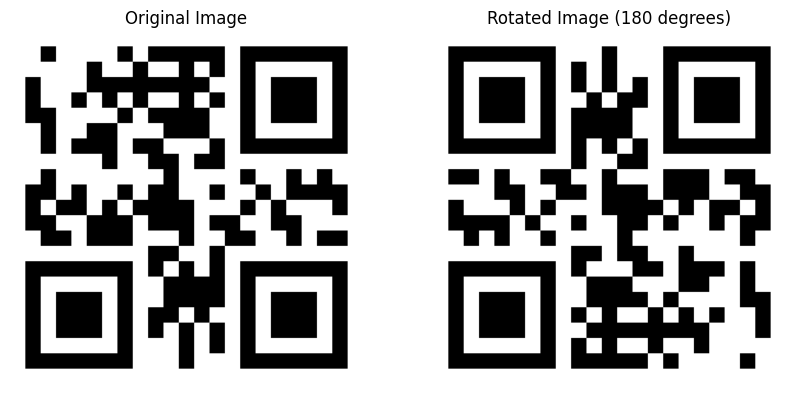

In [ ]:
#lefy bena ya donzz
import cv2 as cv
import matplotlib.pyplot as plt

# Read the image
img_path = '/content/sample_data/images/03-Leffy-bina-ya-donya.png'
img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
assert img is not None, "File could not be read, check with os.path.exists()"


# Rotate the image by 180 degrees
rows, cols = img.shape
M = cv.getRotationMatrix2D(((cols-1)/2.0, (rows-1)/2.0), 180, 1)
final_result = cv.warpAffine(img, M, (cols, rows))

# Display the original and rotated images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(final_result, cmap='gray')
plt.title('Rotated Image (180 degrees)')
plt.axis('off')

plt.show()


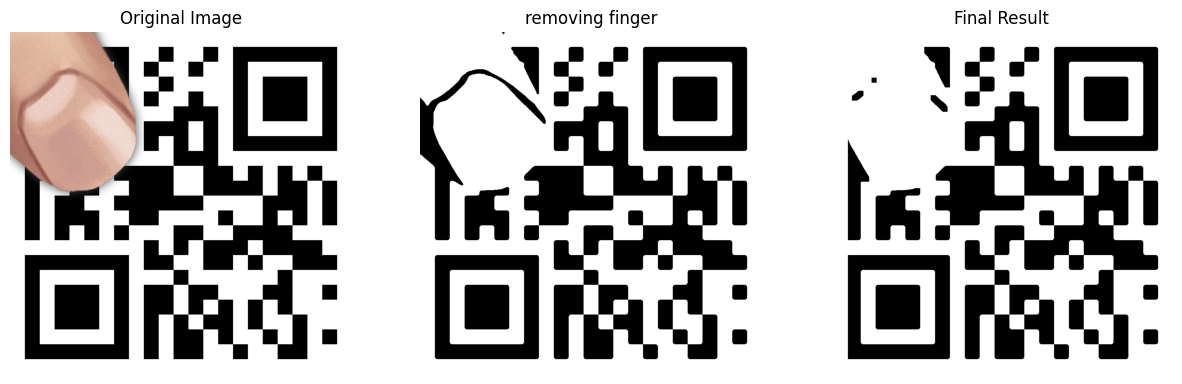

In [163]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image = cv2.imread(r'/content/sample_data/images/07-THE-MIGHTY-FINGER.png')

# Check if the image was loaded successfully
if image is None:
    print("Error: Unable to load image.")
else:
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply median filter to remove salt and pepper noise
    median_filtered = cv2.medianBlur(gray, 11)  # Adjust the kernel size as needed

    # Apply thresholding to remove gray background
    _, thresholded = cv2.threshold(median_filtered, 150, 255, cv2.THRESH_BINARY)

    # Morphological operations to remove small black noise regions
    kernel = np.ones((15, 15), np.uint8)
    Morpho = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, kernel)
    final_result= cv2.morphologyEx(Morpho, cv2.MORPH_CLOSE, kernel)  # Corrected this line

    # Delete the first columns (set them to white)
    final_result[:, :50] = 255  # Adjust the number of columns to delete as needed

    # Display the original, median filtered, and processed images side by side
    plt.figure(figsize=(15, 5))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Thresholded image
    plt.subplot(1, 3, 2)
    plt.imshow(thresholded, cmap='gray')
    plt.title('removing finger')
    plt.axis('off')

    # Filtered thresholded image
    plt.subplot(1, 3, 3)
    plt.imshow(final_result, cmap='gray')
    plt.title('Final Result')
    plt.axis('off')

    plt.show()

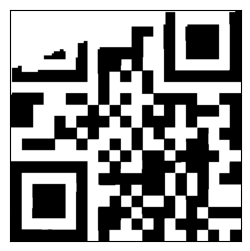

(945, 945)


In [265]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


# Determine the size of the QR code region without the quiet zone
start_row = -1
start_col = -1
end_row = -1
end_col = -1

for row_index, row in enumerate(final_result):
    for pixel in row:
        if (pixel != 255).any():
            start_row = row_index
            break
    if start_row != -1:
        break

for row_index, row in enumerate(final_result[::-1]):
    for pixel in row:
        if (pixel != 255).any():
            end_row = final_result.shape[0] - row_index
            break
    if end_row != -1:
        break

for col_index, col in enumerate(cv2.transpose(final_result)):
    for pixel in col:
        if (pixel != 255).any():
            start_col = col_index
            break
    if start_col != -1:
        break

for col_index, col in enumerate(cv2.transpose(final_result)[::-1]):
    for pixel in col:
        if (pixel != 255).any():
            end_col = final_result.shape[1] - col_index
            break
    if end_col != -1:
        break

qr_no_quiet_zone = final_result[start_row:end_row, start_col:end_col]

# Calculate the number of grid cells
grid_cells_num = 21

# Calculate the size of each grid cell
grid_cell_size = int(max(np.ceil(qr_no_quiet_zone.shape[0] / grid_cells_num),
                         np.ceil(qr_no_quiet_zone.shape[1] / grid_cells_num)))

# Resize the QR code region to ensure it's a square matrix
qr_dim = grid_cells_num * grid_cell_size
qr_no_quiet_zone = cv2.resize(qr_no_quiet_zone, (qr_dim, qr_dim))

# Reshape the resized QR code region into a 3-dimensional array
qr_cells_3d = qr_no_quiet_zone.reshape((grid_cells_num, grid_cell_size, -1))

# Determine the number of splits along each axis to ensure equal division
split_size = qr_cells_3d.shape[2] // grid_cells_num

# Manually split the 3-dimensional array into individual cells
qr_cells = np.array([[qr_cells_3d[i, :, j * split_size:(j + 1) * split_size] for j in range(grid_cells_num)] for i in range(grid_cells_num)])


# Display the resized QR code region
fig = plt.figure(figsize=(3, 3))
plt.xticks([], [])
plt.yticks([], [])
plt.imshow(qr_no_quiet_zone, cmap='gray')
plt.show()
print(qr_no_quiet_zone.shape)

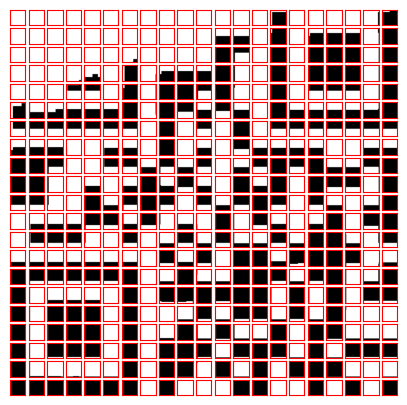

In [266]:
_, axes = plt.subplots(grid_cells_num, grid_cells_num, figsize=(5, 5))
for i, row in enumerate(axes):
    for j, col in enumerate(row):
        col.imshow(qr_cells[i][j], cmap="gray", vmin=0, vmax=255)
        col.get_xaxis().set_visible(False)
        col.get_yaxis().set_visible(False)
        col.spines[:].set_color('red')



In [270]:
import numpy as np
import cv2
#ams7 column el mighty finger
# qr_cells = qr_cells[:, 1:]
# Assuming grid_cells_num is the number of cells in each row/column of the grid
grid_cells_num = len(qr_cells)  # Assuming qr_cells is a square grid



# Create an empty numeric array to store the converted grid
qr_cells_numeric = np.ndarray((grid_cells_num, grid_cells_num), dtype=np.uint8)


for i, row in enumerate(qr_cells):
    for j, cell in enumerate(row):
        qr_cells_numeric[i, j] = (np.median(cell)//255)



print('***********************************************************')


print('***********************************************************')
#Generic code for fixing locator boxes bs incomplete
# def determine_case(qr_cells_numeric):
#     # Check the shape of the input grid to determine the case
#     if qr_cells_numeric.shape[0] == qr_cells_numeric.shape[1] and qr_cells_numeric.shape[0] >= 14:
#         if (qr_cells_numeric[:7, :7] == qr_cells_numeric[-7:, :7]).all():
#             return 1
#         elif (qr_cells_numeric[:7, :7] == qr_cells_numeric[-7:, :7]).all():
#             return 2
#         elif (qr_cells_numeric[:7, -7:] == qr_cells_numeric[-7:, :7]).all():
#             return 3
#     # Add more conditions for other cases if needed
#     else:
#         raise ValueError("Invalid QR code data")

# # Get the case number
# case = determine_case(qr_cells_numeric)

# # Perform actions based on the determined case
# if case == 1:
#     source_data = qr_cells_numeric[-7:, :7]
#     destination_regions = [(slice(None, 7), slice(None, 7)), (slice(None, 7), slice(-7, None))]
# elif case == 2:
#     source_data = qr_cells_numeric[:7, :7]
#     destination_regions = [(slice(-7, None), slice(None, 7)), (slice(None, 7), slice(-7, None))]
# elif case == 3:
#     source_data = qr_cells_numeric[:7, -7:]
#     destination_regions = [(slice(None, 7), slice(None, 7)), (slice(-7, None), slice(None, 7))]

# # Copy the source data to the destination regions
# for region in destination_regions:
#     qr_cells_numeric[region] = source_data

#*************************************************************************
#da code manual le fixing el locator boxessss
# le compresso espresso , gone with the wind kmaaan
# bottom_left_data=qr_cells_numeric[-7:, :7]

# qr_cells_numeric[:7, :7]=bottom_left_data
# qr_cells_numeric[:7, -7:] = bottom_left_data

# FOR MIGHTYY FINGER
Top_Right_data=qr_cells_numeric[:7, -7:]
qr_cells_numeric[:7, :7]=Top_Right_data
qr_cells_numeric[-7:, :7]=Top_Right_data

# # Check if all elements in the 7th row from column 0 till column 7 in the top-left are 1s
if np.all(qr_cells_numeric[7, :7] == 1):
    print("All elements are 1s in the specified region.")
else:
    print("Not all elements are 1s in the specified region.")
    # Set elements to 1 if they are not already 1
    qr_cells_numeric[7, :7][qr_cells_numeric[7, :7] != 1] = 1
    qr_cells_numeric[7, -7:][qr_cells_numeric[7, -7:] != 1] = 1

print(qr_cells_numeric)

***********************************************************
***********************************************************
Not all elements are 1s in the specified region.
[[0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0]
 [0 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 0]
 [0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0]
 [0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1]
 [0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0]
 [0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0]
 [0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0]
 [1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0]
 [1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0]
 [1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0]
 [0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0]
 [0 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1]
 [0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1]
 [0 1 0 0 0 1 0 1 0 0

In [268]:
img3_21x21_grid_inv = 1 - qr_cells_numeric

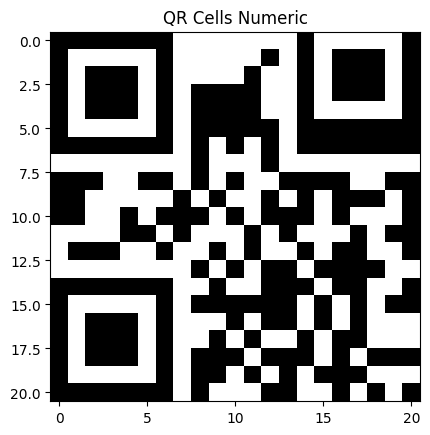

In [269]:
# Plot the qr_cells_numeric array
plt.imshow(img3_21x21_grid_inv, cmap='binary',vmin=0,vmax=1)
plt.title('QR Cells Numeric')
plt.show()

In [257]:
ecl = img3_21x21_grid_inv[8, 0:2]
mask = img3_21x21_grid_inv[8, 2:5]
# I don't care about FEC because I know this is a perfect test case
# However, you! should care (the FEC is what tells you whether the format bits are correct or not)
# I will leave it up to you to check for their correctness via decoding or a lookup table
# Since this time I won't demonstrate the FEC concept, I don't need to apply the FEC mask
# Thus, these are our ECL and MASK values:
print(ecl, mask)
# Remember, regarding the ECL value, we choose from the following:
# Level L (Low)         [11]	7%  of data bytes can be restored.
# Level M (Medium)      [10]	15% of data bytes can be restored.
# Level Q (Quartile)    [01]	25% of data bytes can be restored.
# Level H (High)        [00]	30% of data bytes can be restored.

[1 1] [1 1 0]


In [258]:
# Dictionary of all masks and their equivalent formulae
# P.S. I modified them to account for that I skipped the FEC mask part above
# If you will do it, do not XOR the mask if you wish to use this MASKS table
MASKS = {
    "000": lambda i, j: (i * j) % 2 + (i * j) % 3 == 0,
    "001": lambda i, j: (i // 2 + j // 3) % 2 == 0,
    "010": lambda i, j: ((i + j) % 2 + (i * j) % 3) % 2 == 0,
    "011": lambda i, j: ((i * j) % 2 + (i * j) % 3) % 2 == 0,
    "100": lambda i, j: i % 2 == 0,
    "101": lambda i, j: (i + j) % 2 == 0,
    "110": lambda i, j: (i + j) % 3 == 0,
    "111": lambda i, j: j % 3 == 0,
}
# Enum for the different directions of reading blocks in the QR code
# The number indicates how many bytes are in this block
UP8, UP4, DOWN8, DOWN4, CW8, CCW8 = range(6)

In [259]:
# A more general apply_mask function (still works the same way)
def apply_mask_general(data_start_i, data_start_j, data, mask, direction):
    result = []
    row_offsets = []
    col_offsets = []
    mask_str = ''.join([str(c) for c in mask])
    if (direction in [UP8, UP4]):
        row_offsets = [0,  0, -1, -1, -2, -2, -3, -3]
        col_offsets = [0, -1,  0, -1,  0, -1,  0, -1]
    if (direction in [DOWN8, DOWN4]):
        row_offsets = [0,  0,  1,  1,  2,  2,  3,  3]
        col_offsets = [0, -1,  0, -1,  0, -1,  0, -1]
    if (direction == CW8):
        row_offsets = [0,  0,  1,  1,  1,  1,  0,  0]
        col_offsets = [0, -1,  0, -1, -2, -3, -2, -3]
    if (direction == CCW8):
        row_offsets = [0,  0, -1, -1, -1, -1,  0,  0]
        col_offsets = [0, -1,  0, -1, -2, -3, -2, -3]
    for i, j in zip(row_offsets, col_offsets):
        cell_bit = bool(data[data_start_i+i, data_start_j+j])
        mask_bit = MASKS[mask_str](data_start_i+i, data_start_j+j)
        # Modules corresponding to the dark areas of the mask are inverted.
        result.append(int(not cell_bit if mask_bit else cell_bit))
    return result[:4] if direction in [UP4, DOWN4] else result

In [260]:
enc_bits = apply_mask_general(21-1, 21-1, img3_21x21_grid_inv, mask, UP8)[:4]
print(enc_bits)
# 0001	Numeric encoding (10 bits per 3 digits)
# 0010	Alphanumeric encoding (11 bits per 2 characters)
# 0100	Byte encoding (8 bits per character)
# 1000	Kanji encoding (13 bits per character)
# ...

[0, 1, 0, 0]


In [261]:
len_bits = apply_mask_general(21-3, 21-1, img3_21x21_grid_inv, mask, UP8)
len_int = int(''.join([str(bit) for bit in len_bits]), 2)
print(f'{len_bits} = {len_int} data symbols, each consisting of 8 bits')

[0, 0, 0, 1, 0, 0, 0, 1] = 17 data symbols, each consisting of 8 bits


In [262]:
block_starting_indices = [
    [21-7,  21-1,  UP8],
    [21-11, 21-1,  CCW8],
    [21-10, 21-3,  DOWN8],
    [21-6,  21-3,  DOWN8],
    [21-2,  21-3,  CW8],
    [21-3,  21-5,  UP8],
    [21-7,  21-5,  UP8],
    [21-11, 21-5,  CCW8],
    [21-10, 21-7,  DOWN8],
    [21-6,  21-7,  DOWN8],
    [21-2,  21-7,  CW8],
    [21-3,  21-9,  UP8],
    [21-7,  21-9,  UP8],
    [21-11, 21-9,  UP8],
    [21-16, 21-9,  UP8],
    [21-20, 21-9,  CCW8],
    [21-19, 21-11, DOWN8],
    [21-14, 21-11, DOWN4],  # Special 4-byte block, reserved for END (if exists!)
    [21-12, 21-11, DOWN8],
    [21-8,  21-11, DOWN8],
    [21-4,  21-11, DOWN8],
    [21-9,  21-13, UP8],
    [21-12, 21-16, DOWN8],
    [21-9,  21-18, UP8],
    [21-12, 21-20, DOWN8],
]

In [263]:
message_bits = []
message_bits.extend(enc_bits)
message_bits.extend(len_bits)
# Let me re-format this for better readability :)
# First, let's read the data bytes, starting from the very first byte after enc and len
byte_index = 0
for _ in range(len_int):
    start_i, start_j, dir = block_starting_indices[byte_index]
    bits = apply_mask_general(start_i, start_j, img3_21x21_grid_inv, mask, dir)
    message_bits.extend(bits)
    bit_string = ''.join([str(bit) for bit in bits])
    alpha_char = chr(int(bit_string, 2))
    print(f'{bit_string} (={int(bit_string, 2):03d}) = {alpha_char}')
    byte_index += 1

01100010 (=098) = b
01110101 (=117) = u
01110000 (=112) = p
10100000 (=160) =  
01101111 (=111) = o
01101110 (=110) = n
01101101 (=109) = m
01110010 (=114) = r
01101011 (=107) = k
01001011 (=075) = K
01101111 (=111) = o
00100101 (=037) = %
01101011 (=107) = k
01101110 (=110) = n
01100101 (=101) = e
01111011 (=123) = {
01101101 (=109) = m


In [233]:
# After finishing all the characters, the next 4 bits are expected to be '0000'
start_i, start_j, dir = block_starting_indices[byte_index]
bits = apply_mask_general(start_i, start_j, img3_21x21_grid_inv, mask, dir)
message_bits.extend(bits)
print(bits)
byte_index += 1

[1, 0, 1, 1, 1, 1, 0, 0]


In [194]:
# Let's see what the bytes that follow look like
# There supposedly remain 25-2=23 bytes to be read
for _ in range(23):
    start_i, start_j, dir = block_starting_indices[byte_index]
    bits = apply_mask_general(start_i, start_j, img3_21x21_grid_inv, mask, dir)
    message_bits.extend(bits)
    bit_string = ''.join([str(bit) for bit in bits])
    alpha_char = chr(int(bit_string, 2))
    print(f'{bit_string} (={int(bit_string, 2):03d}) = {alpha_char}')
    byte_index += 1

01110011 (=115) = s
11011101 (=221) = Ý
01000101 (=069) = E
01011010 (=090) = Z
11010000 (=208) = Ð
01111010 (=122) = z
01111011 (=123) = {


IndexError: list index out of range

In [ ]:
!pip install --upgrade reedsolo
import reedsolo as rs

In [195]:
# For every 8 bits in the extracted message, convert to a byte
message_bytes = [int("".join(map(str, message_bits[i:i+8])), 2) for i in range(0, len(message_bits), 8)]

# Create the Reed-Solomon Codec for 7 ECC symbols (again, this is L)
rsc = rs.RSCodec(nsym=7)

# Decode the bytes with the 7-ECC RS Codec
message_decoded = rsc.decode(message_bytes)
rsc.maxerrata(verbose=True)

# In order to extract the actual data, need to convert back to bits
# Then take as many bytes as indicated by the message length indicator
# That is AFTER removing the first 12 bytes (of enc and len)
data_bits = bin(int.from_bytes(message_decoded[0], byteorder='big'))[13:13+len_int*8]

# Now convert back to bytes and print it lol
data_bytes = int(data_bits, 2).to_bytes((len(data_bits)+7)//8, 'big')
print(f'Data in message = "{data_bytes.decode(encoding="iso-8859-1")}"')


ReedSolomonError: Too many errors to correct